In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df=pd.read_csv('cardio.csv')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholestrol,gluc,smoke,alco,active,cardio
0,63.0,1,155.0,69.0,130,80,2,2,0,0,1,0
1,41.0,1,163.0,71.0,110,70,1,1,0,0,1,1
2,61.0,1,165.0,70.0,120,80,1,1,0,0,1,0
3,41.0,2,165.0,85.0,120,80,1,1,1,1,1,0
4,65.0,1,155.0,62.0,120,80,1,1,0,0,1,0


In [4]:
df.shape

(69301, 12)

In [5]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholestrol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,54.580829,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,6.860835,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,66.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

age           0
gender        0
height        0
weight        0
ap_hi         0
ap_lo         0
cholestrol    0
gluc          0
smoke         0
alco          0
active        0
cardio        0
dtype: int64

In [7]:
df.dtypes

age           float64
gender          int64
height        float64
weight        float64
ap_hi           int64
ap_lo           int64
cholestrol      int64
gluc            int64
smoke           int64
alco            int64
active          int64
cardio          int64
dtype: object

In [8]:
df.gender.unique()

array([1, 2], dtype=int64)

In [9]:
df.groupby('gender')['gender'].agg('count')

gender
1    45079
2    24222
Name: gender, dtype: int64

In [10]:
df1=df.copy()

In [11]:
df1['gender']=df1['gender'].replace({1:'M',2:'F'})

In [12]:
df1.head()

,age,gender,height,weight,ap_hi,ap_lo,cholestrol,gluc,smoke,alco,active,cardio
0,63.0,M,155.0,69.0,130,80,2,2,0,0,1,0
1,41.0,M,163.0,71.0,110,70,1,1,0,0,1,1
2,61.0,M,165.0,70.0,120,80,1,1,0,0,1,0
3,41.0,F,165.0,85.0,120,80,1,1,1,1,1,0
4,65.0,M,155.0,62.0,120,80,1,1,0,0,1,0


<AxesSubplot:xlabel='height'>

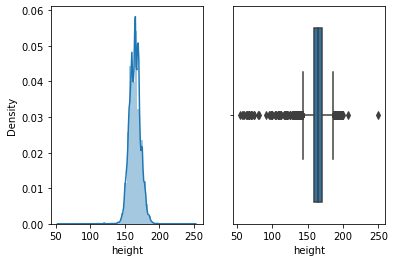

In [13]:
fig,axis=plt.subplots(1,2)
sns.distplot(df1.height, ax=axis[0])
sns.boxplot(df1.height,ax=axis[1])

In [14]:
Q1=df1.height.quantile(0.25)
Q3=df1.height.quantile(0.75)
IQR=Q3-Q1
Q1,Q3,IQR

(159.0, 170.0, 11.0)

In [15]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
upper_limit,lower_limit

(186.5, 142.5)

In [16]:
upper_bound=df1.height.mean()+2*df1.height.std()
lower_bound=df1.height.mean()-1.5*df1.height.std()
upper_bound,lower_bound

(180.77289107953945, 152.05421143234045)

In [17]:
height_out=df1[(df1.height<upper_bound) & (df1.height>lower_bound)]

<AxesSubplot:xlabel='height'>

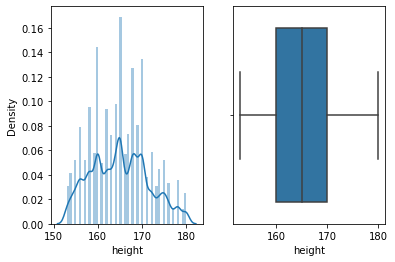

In [18]:
fig,axis=plt.subplots(1,2)
sns.distplot(height_out.height,ax=axis[0])
sns.boxplot(height_out.height,ax=axis[1])

In [19]:
height_out.height.describe()

count    63568.000000
mean       164.995532
std          6.486332
min        153.000000
25%        160.000000
50%        165.000000
75%        170.000000
max        180.000000
Name: height, dtype: float64

In [62]:
df2=height_out.copy()

<AxesSubplot:xlabel='weight'>

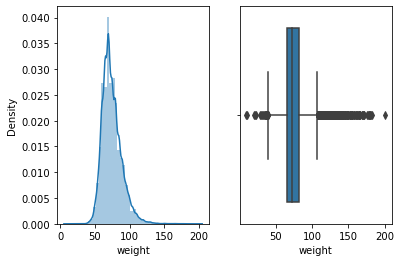

In [63]:
fig,axis=plt.subplots(1,2)
sns.distplot(df2.weight,ax=axis[0])
sns.boxplot(df2.weight,ax=axis[1])

In [64]:
Q1=df2.weight.quantile(0.25)
Q3=df2.weight.quantile(0.75)
IQR=Q3-Q1
Q1,Q3,IQR

(65.0, 82.0, 17.0)

In [65]:
w_lower_limit=Q1-1.5*IQR
w_upper_limit=Q3-1.5*IQR
w_lower_limit,w_upper_limit

(39.5, 56.5)

In [68]:
w_upper_bound=df2.weight.mean()+2*df2.weight.std()
w_lower_bound=df2.weight.mean()-2*df2.weight.std()
w_lower_bound,w_upper_bound

(46.35145734380225, 102.36408034811822)

In [69]:
df2['w_zscore']=(df.weight-df.weight.mean())/df.weight.std()

In [70]:
df2.head()

,age,gender,height,weight,ap_hi,ap_lo,cholestrol,gluc,smoke,alco,active,cardio,w_zscore
0,63.0,M,155.0,69.0,130,80,2,2,0,0,1,0,-0.361737
1,41.0,M,163.0,71.0,110,70,1,1,0,0,1,1,-0.222688
2,61.0,M,165.0,70.0,120,80,1,1,0,0,1,0,-0.292212
3,41.0,F,165.0,85.0,120,80,1,1,1,1,1,0,0.750652
4,65.0,M,155.0,62.0,120,80,1,1,0,0,1,0,-0.848406


In [71]:
df2[df2.weight==60].head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholestrol,gluc,smoke,alco,active,cardio,w_zscore
15,66.0,M,159.0,60.0,120,80,1,1,0,0,1,1,-0.987455
43,55.0,M,170.0,60.0,120,80,1,1,0,0,1,0,-0.987455


In [72]:
df2[df2.weight==81].head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholestrol,gluc,smoke,alco,active,cardio,w_zscore
46,59.0,M,170.0,81.0,170,90,3,3,0,0,0,1,0.472554
110,59.0,F,169.0,81.0,120,80,1,1,0,0,1,0,0.472554


In [74]:
df2=df2[(df2.w_zscore>-0.987) & (df2.w_zscore<=0.472)]

<AxesSubplot:xlabel='weight'>

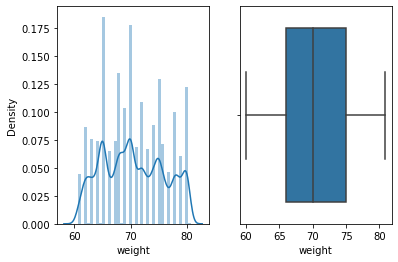

In [78]:
fig,axis=plt.subplots(1,2)
sns.distplot(df2.weight,ax=axis[0])
sns.boxplot(df2.weight,ax=axis[1])

In [80]:
df3=df2.copy()

In [83]:
df3.ap_hi.describe()

count    37230.000000
mean       128.254795
std        187.277402
min       -140.000000
25%        120.000000
50%        120.000000
75%        130.000000
max      16020.000000
Name: ap_hi, dtype: float64

<AxesSubplot:xlabel='ap_hi'>

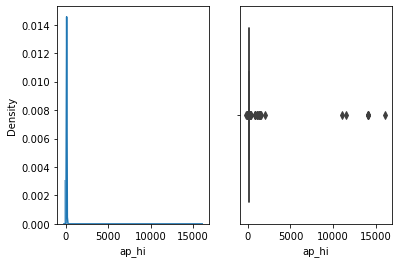

In [84]:
fig,axis=plt.subplots(1,2)
sns.distplot(df3.ap_hi,ax=axis[0])
sns.boxplot(df3.ap_hi,ax=axis[1])

In [85]:
Q1=df3.ap_hi.quantile(0.25)
Q3=df3.ap_hi.quantile(0.75)
IQR=Q3-Q1
Q1,Q3,IQR

(120.0, 130.0, 10.0)

In [86]:
ap_lower_limit=Q1-1.5*IQR
ap_upper_limit=Q3-1.5*IQR
ap_lower_limit,ap_upper_limit

(105.0, 115.0)

In [127]:
ap_hi_min_thresold,ap_hi_max_thresold=df3.ap_hi.quantile([0.09,0.89])
ap_hi_min_thresold,ap_hi_max_thresold

(110.0, 145.0)

In [128]:
ap_hi_outlier=df3[(df3.ap_hi<ap_hi_max_thresold) & (df3.ap_hi>ap_hi_min_thresold)]

In [129]:
ap_hi_outlier.ap_hi.describe()

count    26384.000000
mean       125.260158
std          7.775974
min        111.000000
25%        120.000000
50%        120.000000
75%        130.000000
max        144.000000
Name: ap_hi, dtype: float64

<AxesSubplot:xlabel='ap_hi'>

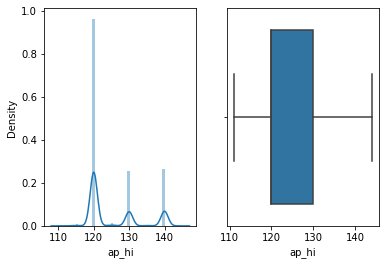

In [130]:
fig,axis=plt.subplots(1,2)
sns.distplot(ap_hi_outlier.ap_hi,ax=axis[0])
sns.boxplot(ap_hi_outlier.ap_hi,ax=axis[1])

In [131]:
df4=ap_hi_outlier.copy()

<AxesSubplot:xlabel='ap_lo'>

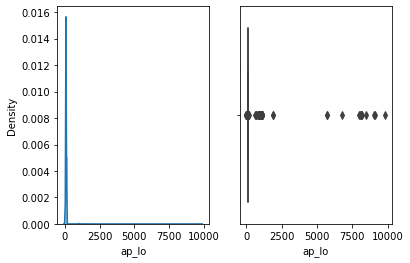

In [133]:
fig,axis=plt.subplots(1,2)
sns.distplot(df4.ap_lo,ax=axis[0])
sns.boxplot(df4.ap_lo,ax=axis[1])

In [229]:
ap_lo_min_thresold,ap_lo_max_thresold=df.ap_hi.quantile([0.003,0.01])
ap_lo_min_thresold,ap_lo_max_thresold

(80.0, 90.0)

In [232]:
ap_lo_outlier=df4[(df4.ap_lo<=ap_lo_max_thresold) & (df4.ap_lo>=ap_lo_min_thresold)]

<AxesSubplot:xlabel='ap_lo'>

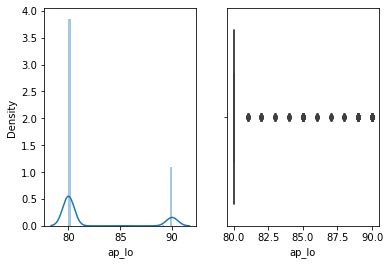

In [233]:
fig,axis=plt.subplots(1,2)
sns.distplot(ap_lo_outlier.ap_lo,ax=axis[0])
sns.boxplot(ap_lo_outlier.ap_lo,ax=axis[1])

In [180]:
ap_lo_outlier.ap_lo.describe()

count    5096.0
mean       90.0
std         0.0
min        90.0
25%        90.0
50%        90.0
75%        90.0
max        90.0
Name: ap_lo, dtype: float64

In [235]:
df5=ap_lo_outlier.copy()

In [236]:
df5.shape

(23129, 13)

In [249]:
gender_dum=pd.get_dummies(df5.gender)
gender_dum.head()

,F,M
0,0,1
2,0,1
4,0,1
9,0,1
13,0,1


In [254]:
df6=pd.concat([df5,gender_dum],axis=1)
df7=df6.drop(['gender','w_zscore'],axis=1)
df7.head()

,age,height,weight,ap_hi,ap_lo,cholestrol,gluc,smoke,alco,active,cardio,F,M
0,63.0,155.0,69.0,130,80,2,2,0,0,1,0,0,1
2,61.0,165.0,70.0,120,80,1,1,0,0,1,0,0,1
4,65.0,155.0,62.0,120,80,1,1,0,0,1,0,0,1
9,63.0,158.0,65.0,140,90,3,1,0,0,1,1,0,1
13,63.0,176.0,72.0,130,90,1,3,0,0,1,1,0,1


In [255]:
X=df7.drop(['cardio'],axis=1)
y=df7.cardio

In [257]:
X.head(3)

,age,height,weight,ap_hi,ap_lo,cholestrol,gluc,smoke,alco,active,F,M
0,63.0,155.0,69.0,130,80,2,2,0,0,1,0,1
2,61.0,165.0,70.0,120,80,1,1,0,0,1,0,1
4,65.0,155.0,62.0,120,80,1,1,0,0,1,0,1


In [258]:
y.head(2)

0    0
2    0
Name: cardio, dtype: int64

In [259]:
df7.shape

(23129, 13)

In [260]:
feature_rank=SelectKBest(score_func=chi2,k=12)
feature_rank_score=feature_rank.fit(X,y)

In [261]:
feature_rank_score

SelectKBest(k=12, score_func=<function chi2 at 0x0000028498AF4DC0>)

In [269]:
Score=pd.DataFrame(feature_rank_score.scores_,columns=['Score'])
column=pd.DataFrame(X.columns)

In [278]:
score_df=pd.concat([column,Score],axis=1)

In [281]:
score_df.columns=['Features','Score']
score_df.sort_values(by='Score',ascending=False)

,Features,Score
3,ap_hi,1516.785614
0,age,790.889251
4,ap_lo,331.617727
5,cholestrol,313.049542
6,gluc,36.266076
2,weight,30.905541
10,F,29.766439
1,height,25.163026
7,smoke,23.674522
11,M,17.366303


In [282]:
final_df=df7.drop(['M'],axis=1)

In [283]:
final_df.head()

,age,height,weight,ap_hi,ap_lo,cholestrol,gluc,smoke,alco,active,cardio,F
0,63.0,155.0,69.0,130,80,2,2,0,0,1,0,0
2,61.0,165.0,70.0,120,80,1,1,0,0,1,0,0
4,65.0,155.0,62.0,120,80,1,1,0,0,1,0,0
9,63.0,158.0,65.0,140,90,3,1,0,0,1,1,0
13,63.0,176.0,72.0,130,90,1,3,0,0,1,1,0


In [285]:
final_df.to_csv('Cardio_Final_DataSet.csv',index=False)